## Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_20241201.csv"
df = pd.read_csv(file_path, low_memory=False)

# 1. Check the size of the dataset
print("Dataset Shape:", df.shape)

# 2. Display the first few rows of the dataset
print("\nFirst Few Rows of Data:")
print(df.head())

# 3. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# 4. Data Types of Columns
print("\nData Types of Columns:")
print(df.dtypes)

# 5. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 6. Unique values in each column (useful for categorical data)
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

# 7. Drop columns with excessive missing values (if necessary)
threshold = 0.5  # Example: Drop columns with more than 50% missing values
columns_to_drop = [col for col in df.columns if df[col].isnull().mean() > threshold]
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
print("\nDropped Columns with More Than 50% Missing Values:")
print(columns_to_drop)

# 8. Save cleaned dataset
output_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df_cleaned.to_csv(output_path, index=False)
print("\nCleaned dataset saved to:", output_path)


C:\Users\ADMIN PC\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Shape: (1969326, 43)

First Few Rows of Data:
                                  SeqID Date Of Stop Time Of Stop Agency  \
0  93734695-93e6-4c69-bcf2-d0d9ee47286a   10/24/2024     13:30:00    MCP   
1  20b92176-702a-4071-85e5-43ac0c994529   10/24/2024     04:35:00    MCP   
2  fdf2e5b6-bd2c-4bfc-be33-2ae32e82657c   10/24/2024     08:23:00    MCP   
3  42de2c93-f9b4-4154-b5d0-20106e849909   10/23/2024     22:27:00    MCP   
4  f2dc85fa-311f-444c-af79-e1696e495190   10/24/2024     21:13:00    MCP   

                     SubAgency  \
0  3rd District, Silver Spring   
1        4th District, Wheaton   
2       2nd District, Bethesda   
3  3rd District, Silver Spring   
4  3rd District, Silver Spring   

                                         Description  \
0  EXCEEDING POSTED MAXIMUM SPEED LIMIT: 60 MPH I...   
1  DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...   
2  DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...   
3  DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...   
4  D

SeqID: 1116406
Date Of Stop: 4715
Time Of Stop: 1440
Agency: 1
SubAgency: 9
Description: 17075
Location: 258094
Latitude: 363091
Longitude: 407118
Accident: 2
Belts: 2
Personal Injury: 2
Property Damage: 2
Fatal: 2
Commercial License: 2
HAZMAT: 2
Commercial Vehicle: 2
Alcohol: 2
Work Zone: 2
Search Conducted: 2
Search Disposition: 7
Search Outcome: 5
Search Reason: 10
Search Reason For Stop: 821
Search Type: 6
Search Arrest Reason: 9
State: 72
VehicleType: 33
Year: 415
Make: 4777
Model: 22773
Color: 26
Violation Type: 4
Charge: 1175
Article: 6
Contributed To Accident: 2
Race: 6
Gender: 3
Driver City: 9112
Driver State: 68
DL State: 72
Arrest Type: 19
Geolocation: 975605

Dropped Columns with More Than 50% Missing Values:
['Search Disposition', 'Search Reason', 'Search Type', 'Search Arrest Reason']

Cleaned dataset saved to: C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv


## Exploratory Data Analysis

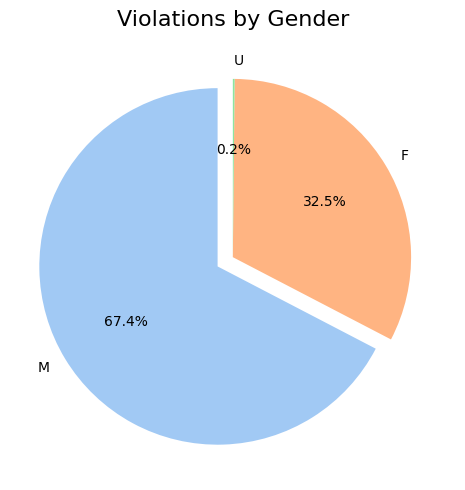

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

if 'Gender' in df.columns:
    # Plot: Violations by Gender
    plt.figure(figsize=(8, 5))
    gender_counts = df['Gender'].value_counts()

    # Dynamically adjust colors and explode based on unique categories
    explode = [0.1] + [0] * (len(gender_counts) - 1)
    colors = sns.color_palette('pastel', len(gender_counts))

    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90, explode=explode)
    plt.title('Violations by Gender', fontsize=16)
    plt.ylabel('')  # Hide y-label for the pie chart
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Gender' is missing in the dataset.")


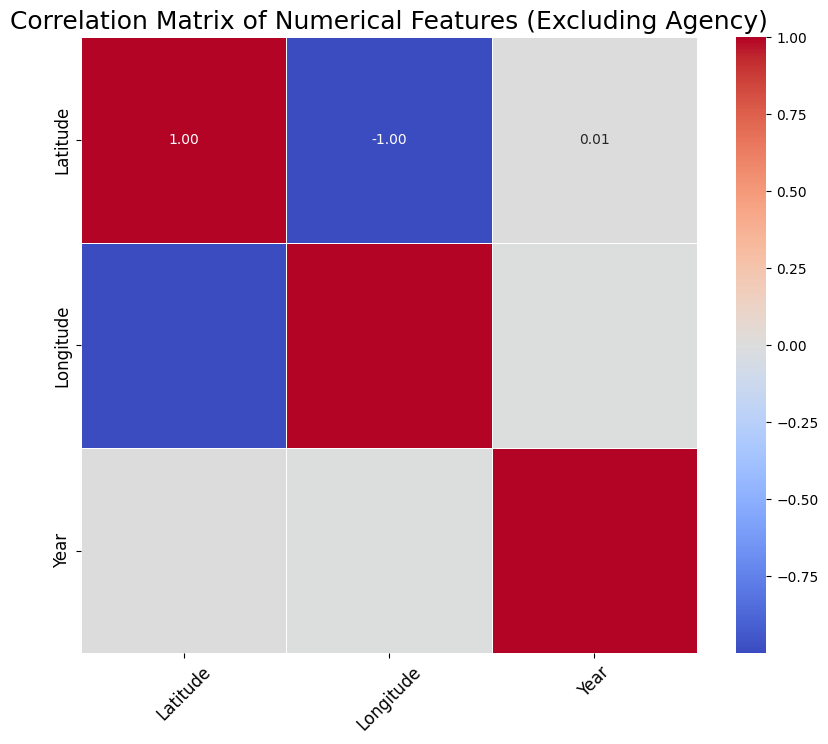

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Agency' column
if 'Agency' in df.columns:
    df= df.drop(columns=['Agency'])

# Compute the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the updated correlation matrix with larger figure size
plt.figure(figsize=(10, 8))  # Increased figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Excluding Agency)', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


## Non Trivial questions

1. Temporal Trends: Violation Types by Time of Day and Day of the Week

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_15848\1753678798.py:8: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


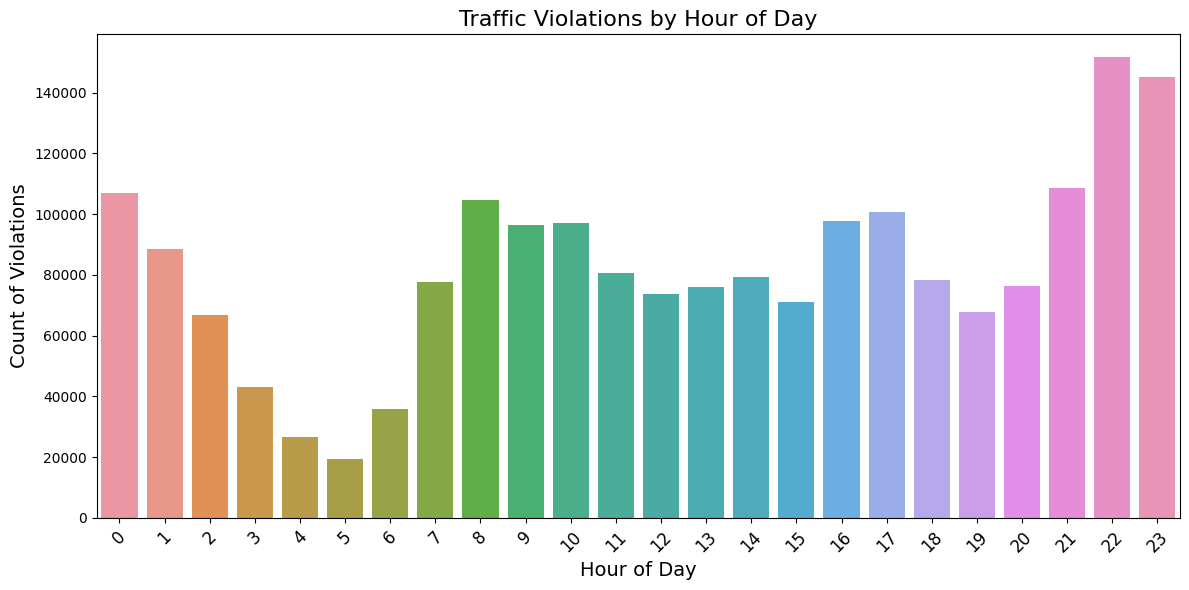

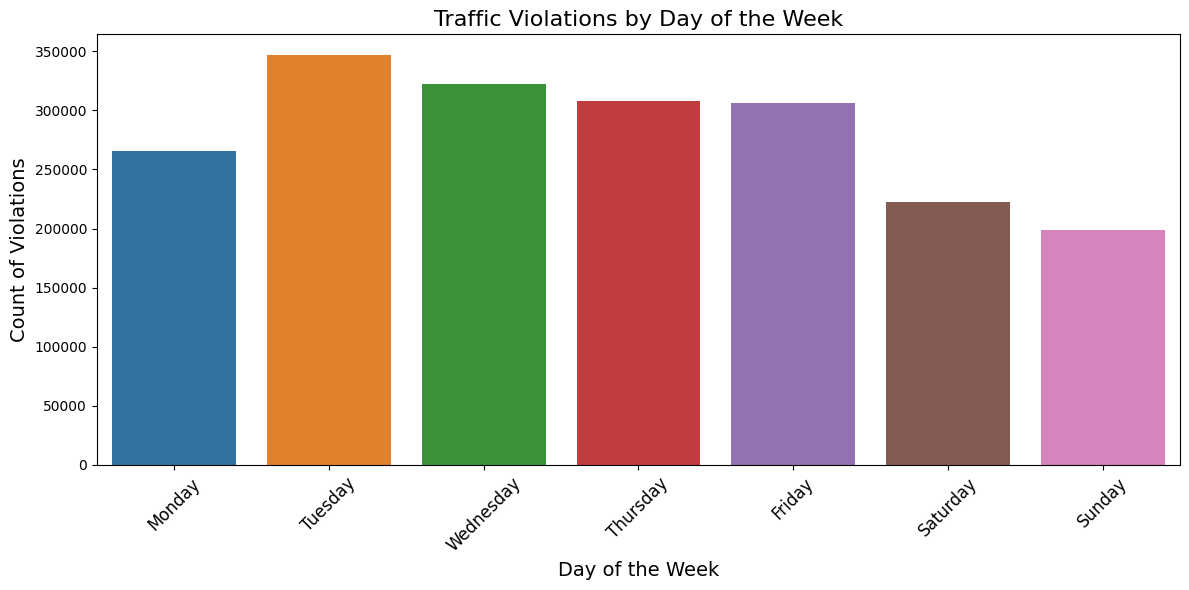

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df = pd.read_csv(file_path)

# Convert 'Date Of Stop' and 'Time Of Stop' to datetime
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], format='%H:%M:%S', errors='coerce')

# Extract day of the week and hour of the day
df['Day Of Week'] = df['Date Of Stop'].dt.day_name()
df['Hour Of Day'] = df['Time Of Stop'].dt.hour

# Plot violation counts by hour of day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour Of Day', order=sorted(df['Hour Of Day'].dropna().unique()))
plt.title('Traffic Violations by Hour of Day', fontsize=16)

# The error was likely caused by plt.xlabel being overwritten.
# This line calls the original matplotlib.pyplot.xlabel function.
plt.xlabel('Hour of Day', fontsize=14)

plt.ylabel('Count of Violations', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Plot violation counts by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Day Of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Traffic Violations by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count of Violations', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

2. Severity Patterns: Violations Leading to Severe Outcomes (e.g., Accidents)

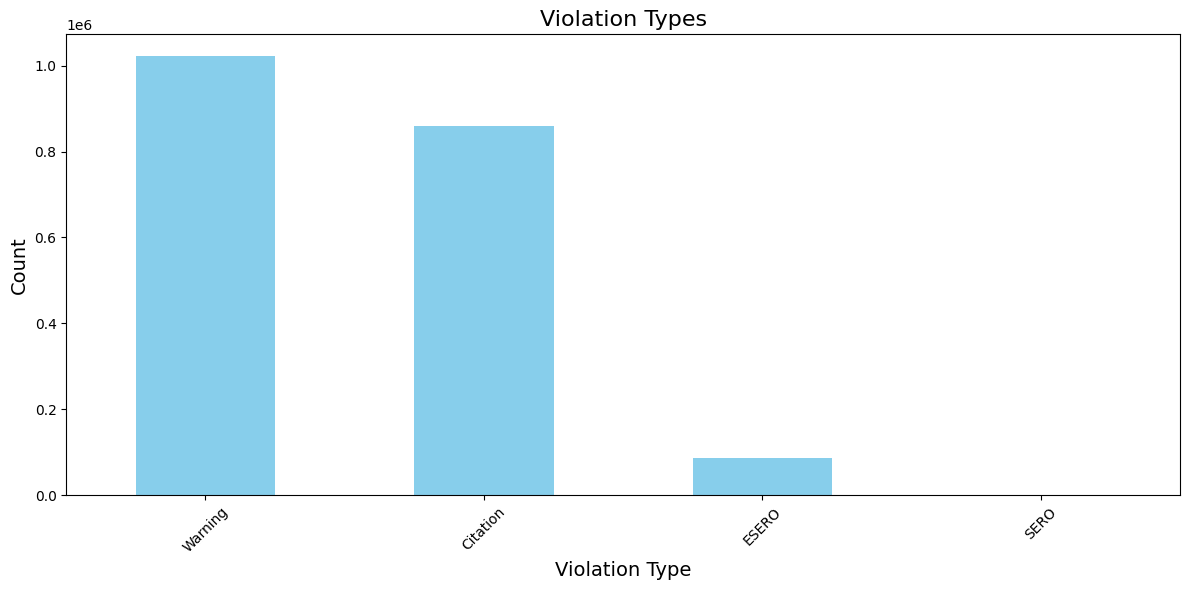

In [13]:
plt.figure(figsize=(12, 6))
df['Violation Type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Violation Types', fontsize=16)
plt.xlabel('Violation Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Geospatial Patterns: Violation Types by Location

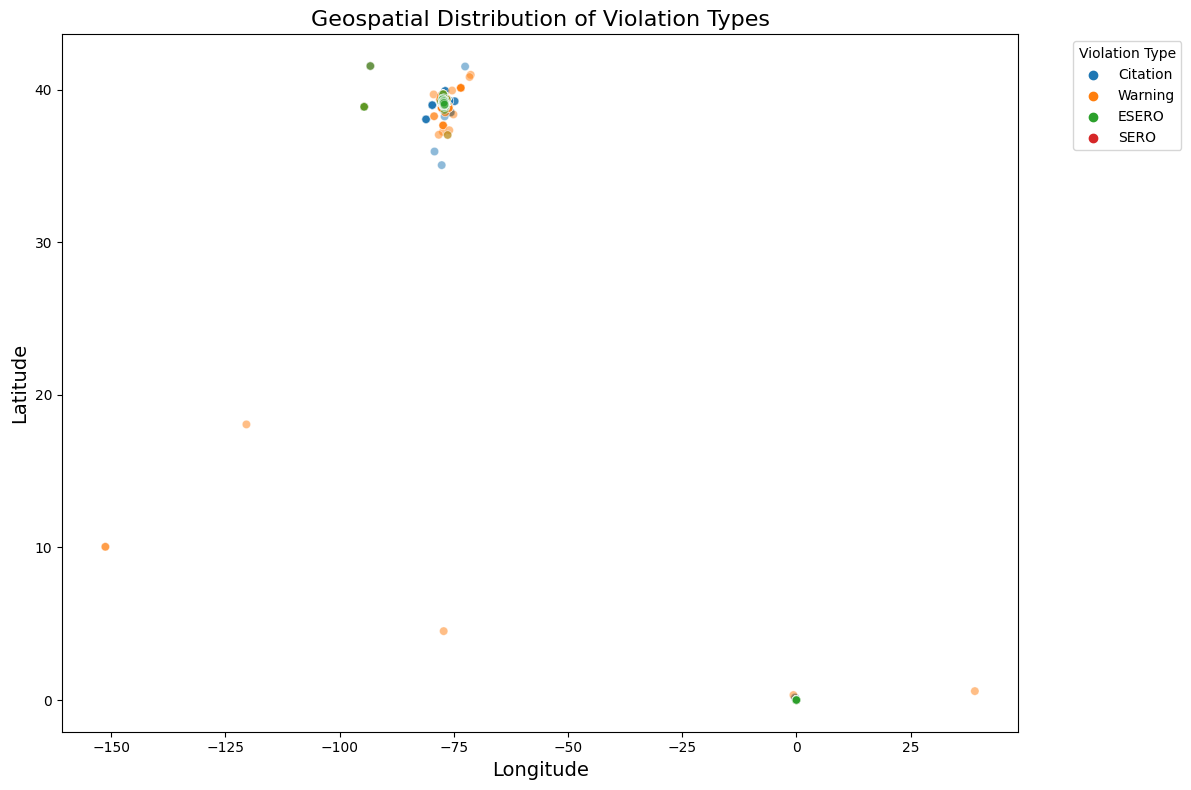

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Latitude' and 'Longitude' are numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filter rows with valid latitude and longitude
geo_filtered = df.dropna(subset=['Latitude', 'Longitude'])

# Plot: Geospatial scatter plot of violations
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=geo_filtered,
    x='Longitude',
    y='Latitude',
    hue='Violation Type',
    alpha=0.5,
    palette='tab10'
)
plt.title('Geospatial Distribution of Violation Types', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


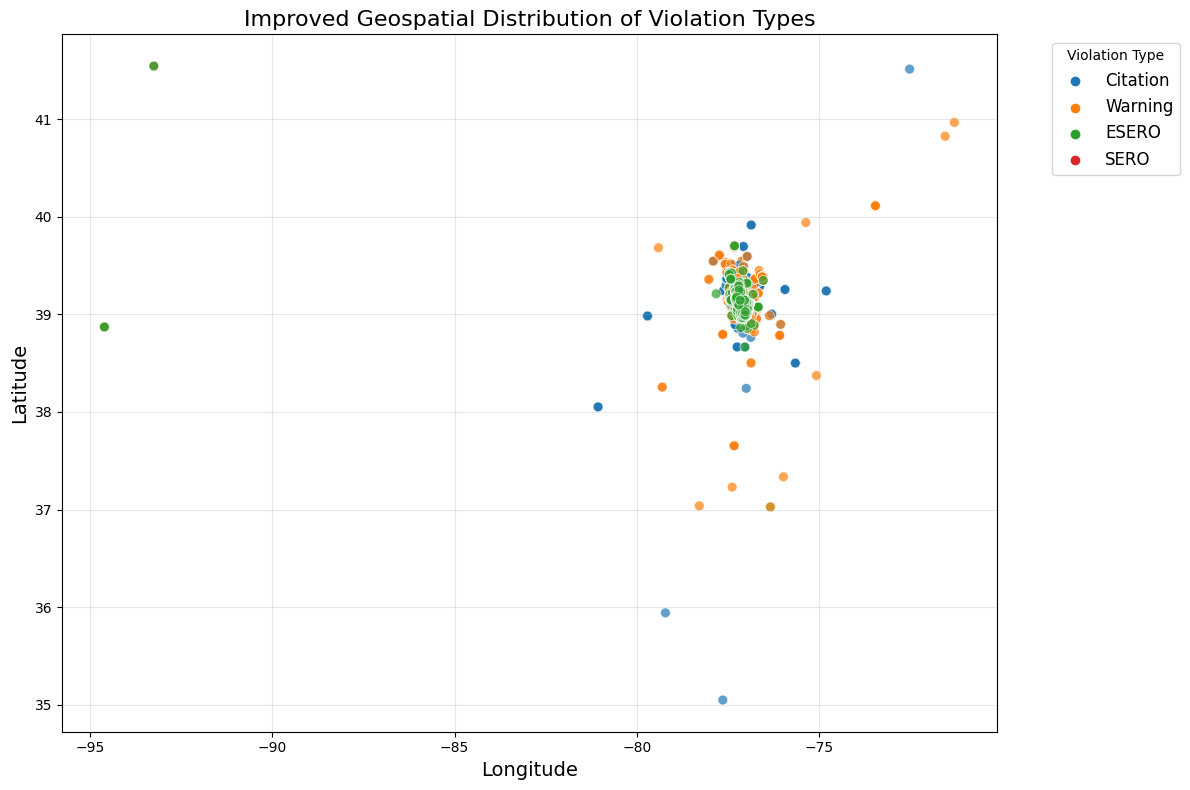

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Latitude' and 'Longitude' are numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filter rows with valid latitude and longitude
geo_filtered = df[(df['Latitude'].between(30, 50)) & (df['Longitude'].between(-130, -60))]

# scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=geo_filtered,
    x='Longitude',
    y='Latitude',
    hue='Violation Type',
    alpha=0.7,
    palette='tab10',
    s=50  # Marker size
)
plt.title('Geospatial Distribution of Violation Types', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Violation Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


4. Search and Arrest Analysis: Correlation with Violation Types

<Figure size 1400x800 with 0 Axes>

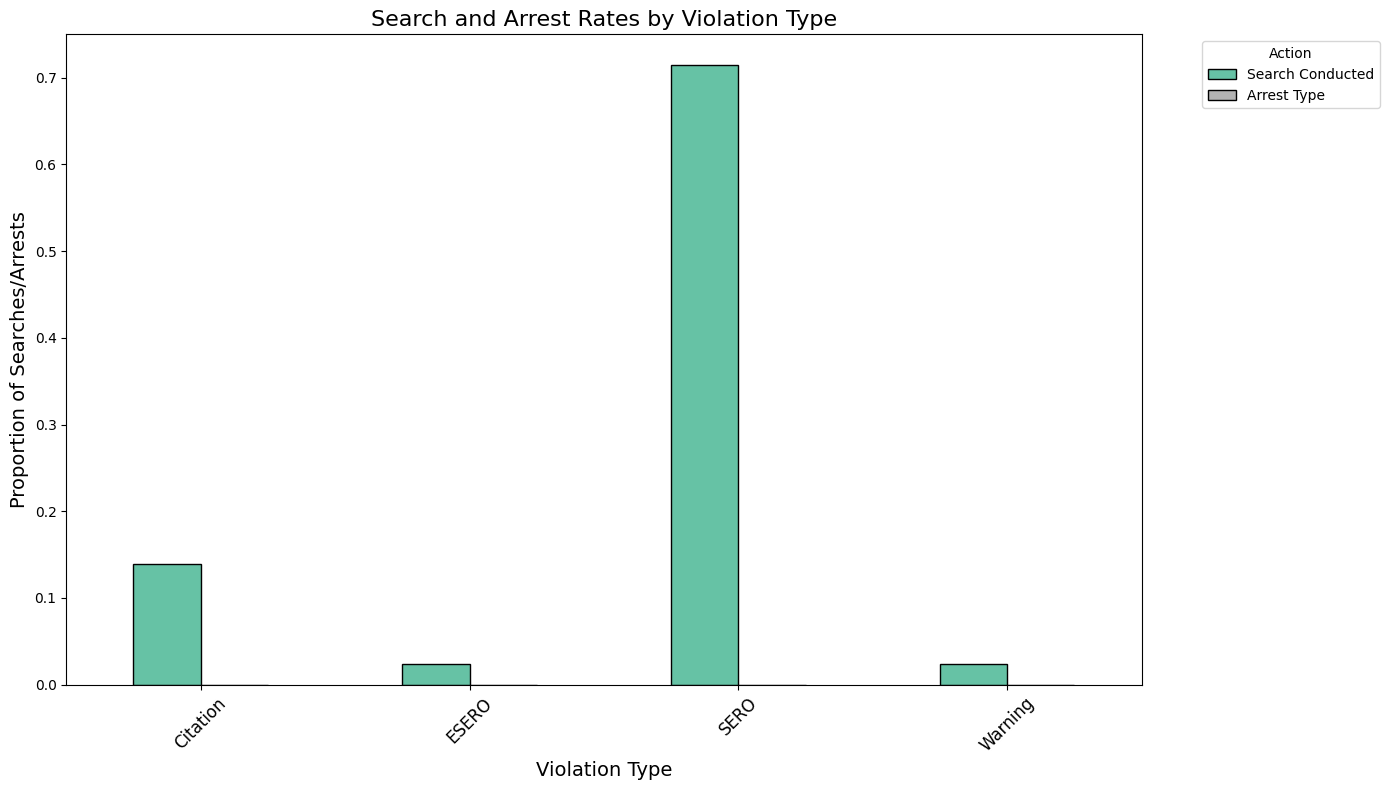

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are numeric or properly encoded
search_arrest_columns = ['Search Conducted', 'Arrest Type']
df[search_arrest_columns] = df[search_arrest_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Group by 'Violation Type' and calculate the mean of search and arrest rates
search_arrest_data = df.groupby('Violation Type')[search_arrest_columns].mean()

# Plot the correlation between violation type, search, and arrest rates
plt.figure(figsize=(14, 8))
search_arrest_data.plot(kind='bar', figsize=(14, 8), colormap='Set2', edgecolor='black')
plt.title('Search and Arrest Rates by Violation Type', fontsize=16)
plt.xlabel('Violation Type', fontsize=14)
plt.ylabel('Proportion of Searches/Arrests', fontsize=14)
plt.legend(title='Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


## Modeling

Can we predict whether a traffic stop will result in a search being conducted (Search Conducted) based on violation type, driver demographics, and vehicle details?

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df = pd.read_csv(file_path)

# Ensure necessary columns are present
required_columns = ['Search Conducted', 'Violation Type', 'Race', 'Gender', 'VehicleType', 'Year']
df = df[required_columns]

# Encode the target variable: 'Search Conducted'
df['Search Conducted'] = df['Search Conducted'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
categorical_features = ['Violation Type', 'Race', 'Gender', 'VehicleType']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Handle missing values (drop or impute)
df = df.dropna()

# Split data into features (X) and target (y)
X = df.drop('Search Conducted', axis=1)
y = df['Search Conducted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top Features Influencing Search Conducted Prediction:")
print(importance.head(10))


C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_15848\1861651785.py:8: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Accuracy: 0.9276917373754016

Confusion Matrix:
 [[225219     63]
 [ 17492      6]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    225282
         1.0       0.09      0.00      0.00     17498

    accuracy                           0.93    242780
   macro avg       0.51      0.50      0.48    242780
weighted avg       0.87      0.93      0.89    242780

Top Features Influencing Search Conducted Prediction:
                          Feature  Coefficient
9                        Gender_M     0.677769
11    VehicleType_02 - Automobile     0.492152
4                      Race_BLACK     0.394767
5                   Race_HISPANIC     0.356109
8                      Race_WHITE     0.084649
35   VehicleType_22 - Mobile Home     0.003226
2             Violation Type_SERO     0.002826
13     VehicleType_04 - Limousine     0.002771
39  VehicleType_26 - Boat Trailer     0.002022
42       VehicleType_29 - Unknown     0.

Can we predict whether a traffic stop will result in an arrest (Arrest Type) based on violation type, driver demographics, and contextual factors?

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_15848\1469998529.py:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\ADMIN PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set 


Classification Report:
                                         precision    recall  f1-score   support

                     A - Marked Patrol       0.81      1.00      0.89    317411
                   B - Unmarked Patrol       0.37      0.01      0.02     16903
                     C - Marked VASCAR       1.00      0.01      0.02       107
                   D - Unmarked VASCAR       0.50      0.02      0.04        54
           E - Marked Stationary Radar       0.55      0.00      0.00      2793
         F - Unmarked Stationary Radar       0.00      0.00      0.00       218
  G - Marked Moving Radar (Stationary)       0.39      0.00      0.01      3595
H - Unmarked Moving Radar (Stationary)       0.00      0.00      0.00       476
      I - Marked Moving Radar (Moving)       0.00      0.00      0.00       788
    J - Unmarked Moving Radar (Moving)       0.00      0.00      0.00       222
                   K - Aircraft Assist       0.00      0.00      0.00        13
              

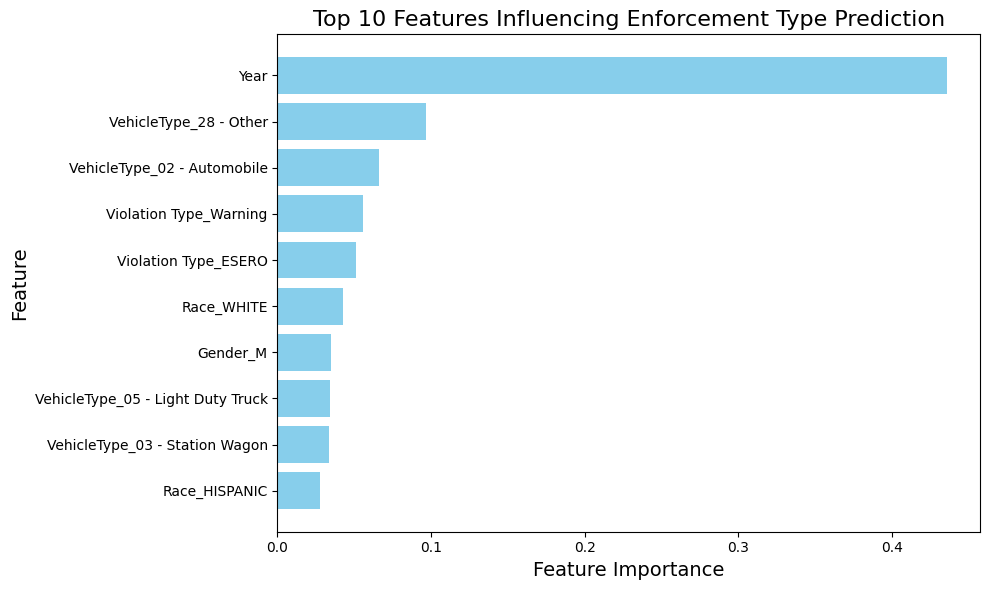

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df = pd.read_csv(file_path)

# Select relevant columns
required_columns = ['Arrest Type', 'Violation Type', 'Race', 'Gender', 'VehicleType', 'Year', 'Alcohol', 'Work Zone']
df = df[required_columns]

# Handle missing values
# Replace missing numeric values with the median
df['Year'] = df['Year'].fillna(df['Year'].median())

# Replace missing categorical values with 'Unknown'
for col in ['Arrest Type', 'Violation Type', 'Race', 'Gender', 'VehicleType', 'Alcohol', 'Work Zone']:
    df[col] = df[col].fillna('Unknown')

# One-hot encode categorical variables
categorical_features = ['Violation Type', 'Race', 'Gender', 'VehicleType', 'Alcohol', 'Work Zone']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split features (X) and target (y)
X = df.drop('Arrest Type', axis=1)
y = df['Arrest Type']  # Multi-class target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Extract feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top Features Influencing Enforcement Type Prediction:")
print(importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'].head(10), importance['Importance'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Enforcement Type Prediction', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


Can we predict whether alcohol involvement (Alcohol) is a factor during a traffic violation based on violation type, driver demographics, and vehicle details?

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_15848\568773736.py:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training Set Shape: (1575460, 44)
Testing Set Shape: (393866, 44)
Accuracy: 0.9987000655045117

Confusion Matrix:
 [[393348      1]
 [   511      6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    393349
           1       0.86      0.01      0.02       517

    accuracy                           1.00    393866
   macro avg       0.93      0.51      0.51    393866
weighted avg       1.00      1.00      1.00    393866

Top Features Influencing Alcohol Prediction:
                                  Feature  Importance
0                                    Year    0.530575
4                              Race_BLACK    0.128385
3                  Violation Type_Warning    0.093330
17  VehicleType_08 - Recreational Vehicle    0.091407
34        VehicleType_21 - Tandem Trailer    0.033959
1                    Violation Type_ESERO    0.028161
11            VehicleType_02 - Automobile    0.026474
8                    

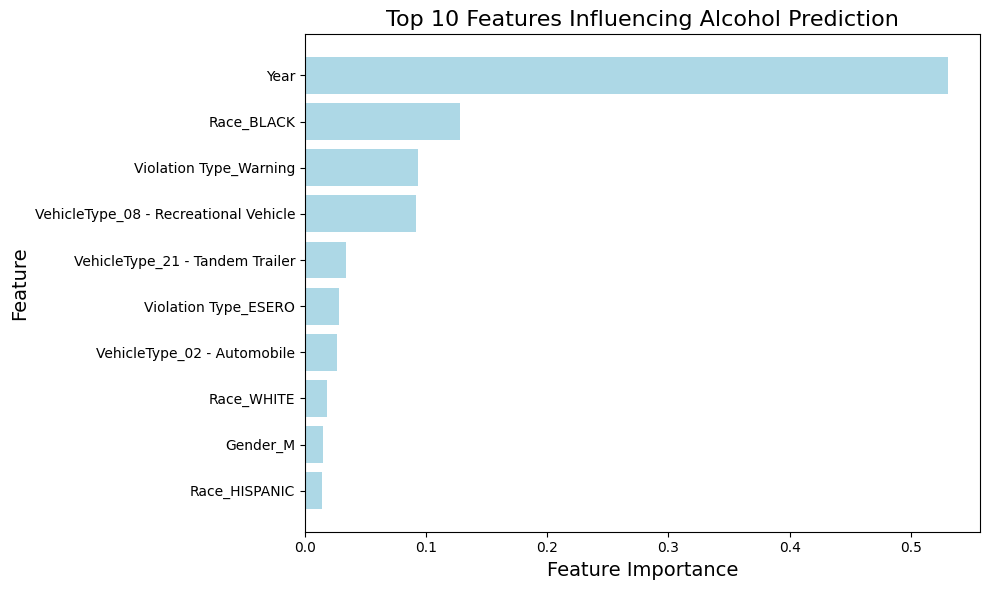

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\ADMIN PC\Downloads\projects\Krishna BIGDATA\Traffic_Violations_Cleaned.csv"
df = pd.read_csv(file_path)

# Select relevant columns
required_columns = ['Alcohol', 'Violation Type', 'Race', 'Gender', 'VehicleType', 'Year', 'Work Zone']
df = df[required_columns]

# Encode the target variable: 'Alcohol'
df['Alcohol'] = df['Alcohol'].map({'Yes': 1, 'No': 0})

# Handle missing values
df['Year'] = df['Year'].fillna(df['Year'].median())  # Fill numeric missing values with median
for col in ['Violation Type', 'Race', 'Gender', 'VehicleType', 'Work Zone']:
    df[col] = df[col].fillna('Unknown')  # Fill categorical missing values with 'Unknown'

# One-hot encode categorical variables
categorical_features = ['Violation Type', 'Race', 'Gender', 'VehicleType', 'Work Zone']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split features (X) and target (y)
X = df.drop('Alcohol', axis=1)
y = df['Alcohol']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dataset shape
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Extract and plot feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top Features Influencing Alcohol Prediction:")
print(importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'].head(10), importance['Importance'].head(10), color='lightblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Alcohol Prediction', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()
